# A few notes to remember when i come back:

1. Firstly you install Hortonworks HDP into a virtual machine, this allows you to have a Hadoop Distributed File System in your pc.

2. You go to ambari, this is the dashboard.

3. To work with many of this things you have to install PuTTY to communicate properly with HDFS.

4. Using a combination of PuTTY and Ambari you can use:
  1. Spark scripts
  2. Pig Scripts
  3. SQL scripts
  4. SQOOP
  5. Cassandra
  6. MongoDB 
  7. Basically everything untill now is either one of those or combination of them.

NOTE: Remember that pretty much allways you have to make sure the databases you will write into actually exist. They will not be created for you. (Or if they exist that they have the adequate permissions, and proper formating)

# In most cases I did the following exercices:
If they ask you: "what did you do in these databases, how did you use them?"
* Uploading, deleting, appending data into the database and into out of HDFS(like with Cassandra, SQL/MySQL, MongoDB, HBase) - This are the databases that only can do simple operations on them (like read, write only databases). And you connected them to the main HADOOP cluster.

* Modifing/Transforming/Reducing data. With Spark, Pig, SQOOP,MapReduce you can do operations to actually modify and analyze the data.
  - Filter the data
  - Join/Append data
  - Group data by
  - Do averages/Count - Count number of ratings, Check the user average rating. Aggregate by occupation and figure the average age of each ocupation.
  - Analyze/Process data, use AFS algorithm to recoomend movie (SPARK).

#Which database should I use, CAP Theorem

The "CAP" Theorem, Consisntecy, availability, and partition tolerance.
* The CAP theorem says you can only have 2 out of 3.
  - And partition-tolerance is a requirement with "big-data" so you really only choose between consistency and availability.

The pilars:
  + Consistency: When I write something to my database, I'm going to get the answer back right away no matter what. 
  + Availability: Your database must be allways up and running
  + Partition tolerance: Your database can be easily spread up.


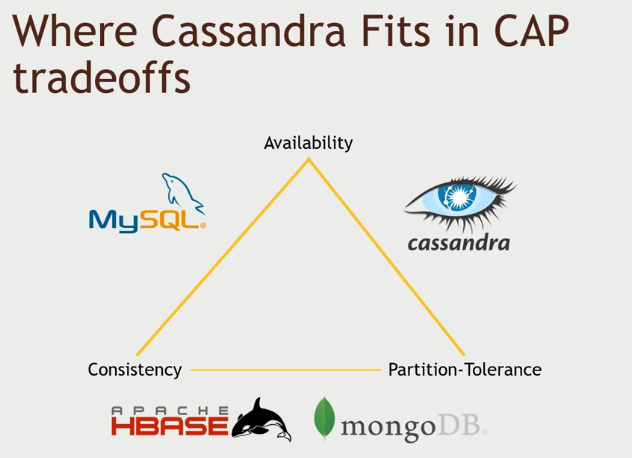

### Cassandra and spark

* DataStax offers a Spark-Cassandra connector
* Allows you to read and write Cassandra tables as DataFrames.
* Is smart about passing queries on those DataFrames down to the appropiate level
* Use Cases:
  - Use spark for analytics on data stored in Cassandra.
  - Use spark to transform data and store it into Cassandra for transactional use.

#MongoDB
* MongoDB is usually preferred in coorporations because it is distributed and supported by an actual company.

# 11. Choosing a database technology.

Although there is no real formula to follow to choose a database there are things to consider.

* We need to consider the **Integration considerations**, what do we need to integrate togheter?
  + Different technolgies have different connectors for other different technologies.
    - For example, if you have a big analytics job currently running in Apache Spark, then you probably want to limit yourself to external databases that can connect easily to Apache Spark.
    - Maybe you have a front-end system that depends on having a SQL interface to a back-end database, and you're thinking about moving from a monolithic relational database to a distributed non-relational database. In that case it might make life a lot easier if the Non-relational database we are moving to offers some sort of SQL-like interface that could be easily migrated to from your front-end application.
  + Think about what needs to connect and talk togheter and see if this is possible.
    - Check if there are any off-the-shelf/well-mantained technologies that make this easier.

* **Scaling requirements**, How much will our data scale and grow over time?
  + For example here you look at mongoDB, Cassandra or HBase where you can distribute the storage of your data across an entire cluster and scale horizontally instead vertically.

* **Transaction rates** How many requests will you get per second?, if you are talking about thousands or more a single database will not cut it. You need something distributed to spread the load of those transactions evenly. You usually need distributed NoSQL databases
  * Typically these situations mean a big website with lots of servers serving lots of people at the same time.

* **Support considerations** 
  + Do we actually have the expertice to spin off this technology and actually configure it properly?, Somethimes this is harder than it seems. 
    - Can I get constant professional support?
    - Can I ousource the support?
    - Usually MongoDB is a good choice because you can pay for support. There are also companies that offer paid support for the larger Apache proyects.

* **Budget, cost of service**
  + Note: Apart from the support, all of this technologies are Open-source, so this might not be a big concern.
  + You usually just think about the cost of the servers themselves here.
    - Usually you can rent the time you need in the servers with Amazon, Google, Microsoft, etc...

* **Think about the CAP Theorem**
  + See the Triangle.
  + Do you need Consistency or Availability?
    - How important is it to be allways up?
    - How important is speed and eventual consistency?
  + Technology has made this desition not that important, usually all techs have decent degrees of all.

* **Keep it simple** 
  + Check the requirements of your proyect and keep it simple, 
    - If you don't need to deal with massive scale, don't use NoSQL.
  + Do not deplay new systems where you might not have much support or expertice if it is not neccesary.
  + Simple architectures and simple technologies are just easier to work with.







## Drill - A Query engine

**Drill allows SQL analysis of disparate data sources, but without having to transform and load it first, so it really talks about having a SQL without a schema** (You can basically have data in MongoDB, Amazon, and Hive and query them all togheter with simple SQL)

Activities:
  - We joined data from two databases (one in hive and one in MongoDB) And analyzed/transformed it.
    + Check how many ratings are there by ocupation (ratings in one database, ocupation in another one)

NOTE: There are other tools;
  * like PRESTO (Which works with cassandra) 
  * or Phoenix that runs on HBASE

I used the same exercice (Ratings per occupation) in Presto, in HBASE i did something else.

To choose between this ones... Well, I like Drill better, but if you are working with cassandra Presto is the way to go. Phoenix  is basically very niche when you only work with HBase and need very fast applications (Phoenix is very optimized)

# Managing your cluster
Basically this are the various technologies that make the cluster work and do stuff. We talk about techs that sit under the hood that manage all the resources on your cluster, like YARN and TEZ. Tools to manage the cluster like OOzie, Zeppelin and Hue. This techs are the "glue" that make the cluster work.



## Zookeeper
This is useful when you need consistency over availiability (When you are dealing with financial transactions YOU NEED EVERYONE TO AGREE) (Cap theorem, it has less availiability but strong consistency).

### Zookeeper Failure modes

* Master crashes, needs to fail over to a backup
* Worker crashes, It's work needs to be redistributed.
* Network trouble - part of your cluster can't see the rest of it.

## Oozie
A system for running and scheduling hadoop tasks, it tends to be more "hands on"

#### NOTE: Other than Hortonworks there is Cloudera, and it has HUE Which is just a little bit more intuitive than Hortonworks


# Actually feeding data to your cluster

## Kafka

## Two problems to the streaming process
* How to get data from many sources flowing into your cluster.
  - you might have widely distributed sources of data and you need some sort of mechanism for being able to publish those to your cluster in some scalable and reliable manner;
  - For this we use **Kafka**
* Processing when it gets there.

**KAFA** Solves this. It can communicate in real time any source of info to where it's needed.

To get Kafka running remember that you need to edit 3 .properties files to tell it where to connect, where to drop data, etc...

## Flume

Flumes comes installed with hadoop, but to start up flume we need to write a configuration file that defines the sources, channels and sinks are associated with each agent that you want in your flime setup.


# Analyzing streams of data

If you need really low latency go for storm, else Spark is usually good enough

### Why Spark Streaming?
* "Big data" never stops!
* Analyze data streams in real time, instead of in huge batch jobs daily.
* Analyzing streams of web log data to react to user behavior.
* Analyze streams of real-time sensor data for "IOT".

NOTE: Spark streaming is not really real-time, it deals with micro-batches.

NOTE: Spark is moving towards **Structured Streaming** and **Structured datasets**


NOTE: Remember you can use **Flume** or **Kafka** (or others) to send the data to Spark

## Apache STORM
Another way of processing continous streams of data, this is more real-time in nature.

### What is Storm?
* Another framework for processing continous streams of data on a cluster.
  - Can run on top of YARN (like Spark)
* Works on individual events, not micro-batches.
  - If you need sub-second latency, Storm is for you

### Storm vs. Spark Streaming

* There's something to be said for having the rest of Spark at your disposal. (Spark has a larger environment) 

* But if oyu need truly real-time processing (sub-second) of events as they come in ,Storm's your choice.

* Core Storm offers "tumbling windows" in addition to "sliding windows".
  - tumbling window: As data comes in I want all events that came in EXACTLY the past 5 seconds.
    + You can make sure there is no overlap in events.

* Kafka + Storm seems to be a pretty popular combination.

Storm runs in JAVA

## Flink.
* Another stream processing engine - most similar to Storm.
* Can run on standalone cluster, or on top of YARN or Mesos.
* Highly scalable (1000's of nodes)
* Fault-tolerant
  - Can survive failures while still guaranteeing exactly-once processing
  - Uses "state snapshots" to achieve this.
* Up & coming quickly.

### Flink vs Spark Streaming vs Storm
NOTE: This change fast since the 3 techs are actively developed.

* Flink is faster than Storm
* Flink offers "real streaming" like Storm
* Flink offers a higher-level API like Trident or Spark, but maintains real-time streaming.
* Flink has good Scala support
* Flink has an ecosystem of its own. (like Spark)
* Flink can process data based on event times, not when data was recieved.
  - Impressive windowing system
  - This plus real-time streaming and exactly-once semantics is important for financial applications.
* Flink is the youngest of the technologies.

NOTE: All 3 solutions seem to be converging. So it's basically a question of what best fits with your existing environment. What is available.

### To intall flink
NOTE: You need to download it from the website.


# DESINGING REAL WORLD SYSTEMS


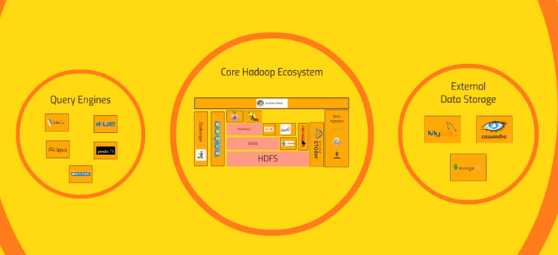

#2. How the pieces fit togheter

Remember:

* Core Hadoop:
  1. HDFS: responshible for managing the storage of data across the cluster. "What gets stored where"
  2. YARN: Manages the computation and processing of data. "What gets run where"
  3. MapReduce: Transform and aggreagate data across the cluster.
    * TEZ is an alternative to MapReduce. Usually faster than MapReduce.
    * **Spark**: Also alternative to MapReduce, but Spark also takes care of the Sql-like queries and has a whole ecosystem.
  4. Hive/Pig: A SQL-like language that allows you to issue SQL-like queries to process the data.
  5. HBase: A no-SQL non-relational database.
  6. SQOOP: Import and export data from MySQL or any relational database into your cluster at scale using map reduce.
  7. ZooKeeper: A piece of infrastructure that allows the mantainance of servers/data reliably.
  8. Oozie: Mantain workflows and schedules jobs.
  9. Apache Stor,/SparkStreaming/Flink: Streaming technologies
  10. Flume/Kafka: Stream data into your cluster at scale. (Move data from one cluster to another and at very high transaction rates).
  11. Apache Amabri: The highest that it's a dashboard.

* External data storage: See triangle. 

* Query engines.
  - Drill/Phoenix/Presto: Allow to write SQL queries that might span multiple storage or database technologies that might be associated with the cluster.
  - HUE: Cloudera answer to ambari.
  - Apache Zeppelin: A iPython notebook style interface to interact with data. 

#Check the last part to get a nice summary on how to choose technologies.

# To learn more:

* O'Reilly is usually a safe bet.
* Go to the actuall technology website (apache.spark.org, etc...)